In [1]:
import torch

In [2]:
# Load model_state.pth
model_dict = torch.load('model_state.pth', map_location='cpu')

In [3]:
from src.models.model import TransferModel
from torchvision.models import vgg19, VGG19_Weights

device = 'cpu'
model = TransferModel(
        base_model=vgg19(weights=VGG19_Weights.DEFAULT),
        pretrained_weights=None,
        device=device,
        mode="pretrain"#"style_transfer"
    )

In [6]:
model

TransferModel(
  (encoder): Encoder(
    (preprocess): Sequential(
      (0): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
      (1): ReflectionPad2d((1, 1, 1, 1))
    )
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
      (1): ReflectionPad2d((1, 1, 1, 1))
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (4): ReflectionPad2d((1, 1, 1, 1))
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (8): ReflectionPad2d((1, 1, 1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
      (11): ReflectionPad2d((1, 1, 1, 1))
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
      (15): ReflectionPad2d((1, 

In [4]:
# Get the model state_dict
state_dict = model.state_dict()

In [7]:
# Modify the model state_dict keys to match the following dict:
dct = {
    "vgg_encoder.block1.0.weight": "encoder.preprocess.0.weight",
    "vgg_encoder.block1.0.bias": "encoder.preprocess.0.bias",
    "vgg_encoder.block1.2.weight": "encoder.model.0.weight",
    "vgg_encoder.block1.2.bias": "encoder.model.0.bias",
    "vgg_encoder.block2.5.weight": "encoder.model.3.weight",
    "vgg_encoder.block2.5.bias": "encoder.model.3.bias",
    "vgg_encoder.block2.9.weight": "encoder.model.7.weight",
    "vgg_encoder.block2.9.bias": "encoder.model.7.bias",
    "vgg_encoder.block3.12.weight": "encoder.model.10.weight",
    "vgg_encoder.block3.12.bias": "encoder.model.10.bias",
    "vgg_encoder.block3.16.weight": "encoder.model.14.weight",
    "vgg_encoder.block3.16.bias": "encoder.model.14.bias",
    "vgg_encoder.block4.19.weight": "encoder.model.17.weight",
    "vgg_encoder.block4.19.bias": "encoder.model.17.bias",
    "vgg_encoder.block4.22.weight": "encoder.model.20.weight",
    "vgg_encoder.block4.22.bias": "encoder.model.20.bias",
    "vgg_encoder.block4.25.weight": "encoder.model.23.weight",
    "vgg_encoder.block4.25.bias": "encoder.model.23.bias",
    "vgg_encoder.block4.29.weight": "encoder.model.27.weight",
    "vgg_encoder.block4.29.bias": "encoder.model.27.bias",

    "decoder.net.1.weight": "decoder.reverse_model.1.weight",
    "decoder.net.1.bias": "decoder.reverse_model.1.weight",
    "decoder.net.5.weight": "decoder.reverse_model.1.weight",
    "decoder.net.5.bias": "decoder.reverse_model.1.weight",
    "decoder.net.8.weight": "decoder.reverse_model.1.weight",
    "decoder.net.8.bias": "decoder.reverse_model.1.weight",
    "decoder.net.11.weight": "decoder.reverse_model.1.weight",
    "decoder.net.11.bias": "decoder.reverse_model.1.weight",
    "decoder.net.14.weight": "decoder.reverse_model.1.weight",
    "decoder.net.14.bias": "decoder.reverse_model.1.weight",
    "decoder.net.18.weight": "decoder.reverse_model.1.weight",
    "decoder.net.18.bias": "decoder.reverse_model.1.weight",
    "decoder.net.21.weight": "decoder.reverse_model.1.weight",
    "decoder.net.21.bias": "decoder.reverse_model.1.weight",
    "decoder.net.25.weight": "decoder.reverse_model.1.weight",
    "decoder.net.25.bias": "decoder.reverse_model.1.weight",
    "decoder.net.28.weight": "decoder.reverse_model.1.weight",
    "decoder.net.28.bias": "decoder.reverse_model.1.weight",
}

new_state_dict = {}
for key, value in state_dict.items():
    new_key = dct.get(key)
    if new_key is not None:
        new_state_dict[new_key] = value
    else:
        new_state_dict[key] = value

In [11]:
# Save the new state_dict
torch.save(new_state_dict, 'convert_model_state.pth')

In [5]:
for k in state_dict.keys():
    print(k)

encoder.preprocess.0.weight
encoder.preprocess.0.bias
encoder.model.0.weight
encoder.model.0.bias
encoder.model.3.weight
encoder.model.3.bias
encoder.model.7.weight
encoder.model.7.bias
encoder.model.10.weight
encoder.model.10.bias
encoder.model.14.weight
encoder.model.14.bias
encoder.model.17.weight
encoder.model.17.bias
encoder.model.20.weight
encoder.model.20.bias
encoder.model.23.weight
encoder.model.23.bias
encoder.model.27.weight
encoder.model.27.bias
encoder.model.30.weight
encoder.model.30.bias
encoder.model.33.weight
encoder.model.33.bias
encoder.model.36.weight
encoder.model.36.bias
encoder.model.40.weight
encoder.model.40.bias
encoder.model.43.weight
encoder.model.43.bias
encoder.model.46.weight
encoder.model.46.bias
encoder.model.49.weight
encoder.model.49.bias
decoder.reverse_model.1.weight
decoder.reverse_model.1.bias
decoder.reverse_model.5.weight
decoder.reverse_model.5.bias
decoder.reverse_model.8.weight
decoder.reverse_model.8.bias
decoder.reverse_model.11.weight
deco

In [29]:
model_dict['vgg_encoder.block1.0.bias']

tensor([-103.9390, -116.7790, -123.6800])

In [11]:
for k in model_dict.keys():
    print(k)

vgg_encoder.block1.0.weight
vgg_encoder.block1.0.bias
vgg_encoder.block1.2.weight
vgg_encoder.block1.2.bias
vgg_encoder.block2.5.weight
vgg_encoder.block2.5.bias
vgg_encoder.block2.9.weight
vgg_encoder.block2.9.bias
vgg_encoder.block3.12.weight
vgg_encoder.block3.12.bias
vgg_encoder.block3.16.weight
vgg_encoder.block3.16.bias
vgg_encoder.block4.19.weight
vgg_encoder.block4.19.bias
vgg_encoder.block4.22.weight
vgg_encoder.block4.22.bias
vgg_encoder.block4.25.weight
vgg_encoder.block4.25.bias
vgg_encoder.block4.29.weight
vgg_encoder.block4.29.bias
decoder.net.1.weight
decoder.net.1.bias
decoder.net.5.weight
decoder.net.5.bias
decoder.net.8.weight
decoder.net.8.bias
decoder.net.11.weight
decoder.net.11.bias
decoder.net.14.weight
decoder.net.14.bias
decoder.net.18.weight
decoder.net.18.bias
decoder.net.21.weight
decoder.net.21.bias
decoder.net.25.weight
decoder.net.25.bias
decoder.net.28.weight
decoder.net.28.bias


In [12]:
# Set the new state_dict to the model
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [14]:
import torch
from torchvision.utils import save_image
from torchvision.models import vgg19, VGG19_Weights
from torchvision import transforms

import os
from PIL import Image
import numpy as np

from src.models.model import TransferModel

def get_content_style(
    content_dir: str,
    style_dir: str,
):
    transformations = transforms.Compose([
        transforms.RandomCrop(256),
        transforms.ToTensor()
    ])

    # Get one random content and style image
    content_file = os.path.join(content_dir, np.random.choice(os.listdir(content_dir)))
    style_file = os.path.join(style_dir, np.random.choice(os.listdir(style_dir)))
    content_image = Image.open(content_file).convert("RGB")
    style_image = Image.open(style_file).convert("RGB")

    content_image = transformations(content_image)
    style_image = transformations(style_image)

    return content_image, style_image

In [15]:
n_clusters=3
alpha=0.1
lambd=0.1
gamma=0.1

pretrained_weights = 'convert_model_state.pth'

In [16]:
content_dir = "./data/coco"
style_dir = r"E:\Antoine\data\wikiart\wikiart"

content_image, style_image = get_content_style(content_dir, style_dir)

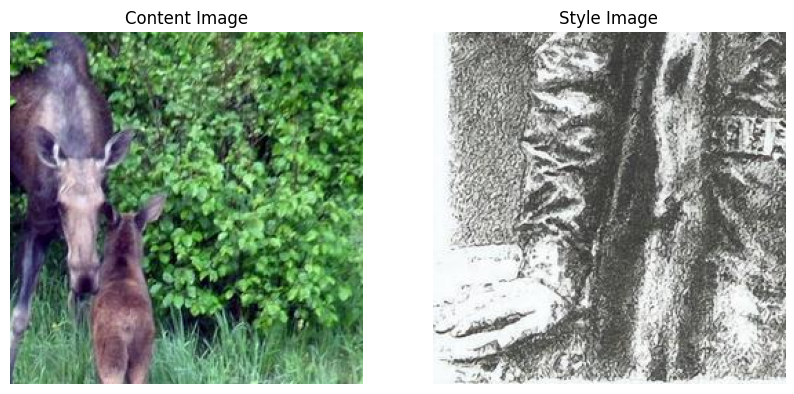

In [17]:
# Plot the content and style image
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(content_image.permute(1, 2, 0))
ax[0].set_title("Content Image")
ax[0].axis("off")
ax[1].imshow(style_image.permute(1, 2, 0))
ax[1].set_title("Style Image")
ax[1].axis("off")
plt.show()

In [18]:
content_image = content_image.unsqueeze(0).to(device)
style_image = style_image.unsqueeze(0).to(device)

output_image = model(content_image, style_image, output_image=True)

In [22]:
output_image.squeeze(0).shape

torch.Size([3, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Output Image')

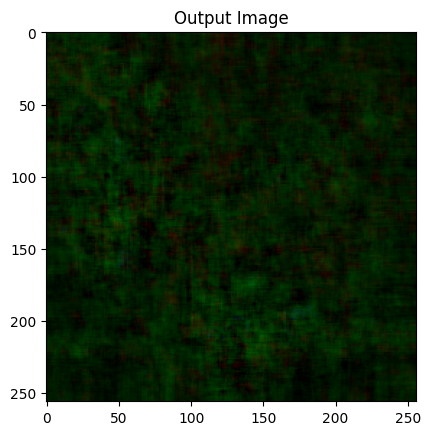

In [23]:
# Plot the output image
plt.imshow(output_image.squeeze(0).permute(1, 2, 0).detach().cpu())
plt.title("Output Image")

In [ ]:
from torchvision.models import vgg19, VGG19_Weights
